In [2]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 11.7 MB/s eta 0:00:00


In [2]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is 

In [1]:
import numpy
print(numpy.__version__)

1.24.4


In [3]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.


In [4]:
import konlpy
import gensim
import sklearn
import seaborn as sns
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances

In [6]:
from collections import Counter

In [7]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#1.word2vec model, art-gen target vocab set

In [14]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

In [15]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

[('작품', 0.8918413519859314),
 ('다큐멘터리', 0.8446187973022461),
 ('에마데딘', 0.8214131593704224),
 ('드라마', 0.8105989098548889),
 ('주제', 0.7782618403434753),
 ('코미디', 0.7742528319358826),
 ('감동', 0.774183452129364),
 ('영화로', 0.7696979641914368),
 ('스토리', 0.7688710689544678),
 ('형식', 0.7663859724998474)]

In [10]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

print("슝~")

슝~


In [11]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [16]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

n = 20
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [ ]:
print(target_art)
print(target_gen)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린', '연인']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체', '한국']


In [ ]:
model.wv.save_word2vec_format('w2v')

In [9]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("w2v")

#2.attribute vocab set

In [17]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [ ]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [ ]:
import pickle
# 저장
with open("genre.pkl", "wb") as f:
    pickle.dump(genre, f)

In [19]:
import pickle
with open("genre.pkl", "rb") as f:
    genre = pickle.load(f)

In [95]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [96]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 100):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 행성, 정체, 친구, 사실, 비밀, 기억, 전쟁, 사건, 시간, 공격, 영화, 한편, 실험, 능력, 시스템, 위협, 생명체, 정부, 아들, 사고, 스타크, 리플리, 과학자, 음모, 파괴, 아버지, 켈빈, 컨트, 모두, 수퍼맨, 임무, 가족, 발생, 요원, 죽음, 다시, 과거, 위기, 외계인, 도시, 운명, 상황, 갑자기, 이제, 분파, 연구, 불명, 때문, 개발, 탈출, 명의, 의문, 아이, 남자, 현실, 바이러스, 진화, 물체, 상어, 통해, 최후, 목숨, 프로젝트, 수트, 생존, 사랑, 과연, 히노키, 섹터, 여행, 미국, 대원, 멸망, 조직, 위험, 바로, 사이, 세력, 감염, 괴물, 거대, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 할머니, 씨제이, 동구, 사람, 아이, 사랑, 학교, 세상, 소년, 슈이트, 이야기, 가장, 어머니, 마갈, 소녀, 미아, 대한, 펠리칸, 모두, 혼자, 서울, 벤트, 케이시, 사건, 마음, 엠마, 할아버지, 크리스마스, 고양이, 사이, 아내, 최호, 요정, 모험, 혜지, 유나, 테리, 위기, 다시, 번개, 손녀, 그레고리, 결심, 과연, 시골, 파코, 영화, 작품, 해나, 스튜어트, 인형, 단편, 기억, 한편, 하나, 서로, 발견, 부산, 장난감, 아스, 도시, 누키, 크누드, 제노, 아기, 때문, 이자, 펠릭스, 노동자, 회사, 사실, 생각, 마르, 주니, 강아지, 시간, 소식, 다른, 간다, 규완, 제페토, 잉그릿, 신차, 우산, 모든, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 비바, 카르피, 왕자, 콘서트, 백작부인, 반니, 아리아, 미노, 차이코프스키, 라다, 무대, 도시, 공작, 리코, 시작, 메스, 파우스트,

In [ ]:
def embed_tokens(tokens, model):
  cleaned_tokens = [[token for token in genre if token in model.wv] for genre in tokens]
  token_list = list(set(token for sublist in cleaned_tokens for token in sublist))
  vectors = [model.wv[token] for token in token_list]

  return cleaned_tokens, np.array(vectors), token_list

In [23]:
def embed_tokens2(tokens,model):
  cleaned_tokens = [[token for token in genre if token in model.wv] for genre in tokens]
  vectors=[]
  for genre in cleaned_tokens:
    vectors.append([model.wv[token] for token in genre])
  return cleaned_tokens, np.array(vectors)

In [ ]:
valid_tokens, embedding, valid_set = embed_tokens(attributes,model)

In [98]:
valid_tokens, embedding2 = embed_tokens2(attributes,model)

In [ ]:
embedding2.shape

(21, 100, 100)

In [ ]:
def get_cluster_centroids_tokens(vectors, tokens, n_clusters=21, top_k=20):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  labels = kmeans.fit_predict(vectors)
  centroids = kmeans.cluster_centers_

  result = {}
  for cluster_id in range(n_clusters):
      idxs = np.where(labels == cluster_id)[0]
      cluster_vecs = vectors[idxs]
      dists = cosine_distances(cluster_vecs, [centroids[cluster_id]]).flatten()
      top_idxs = idxs[np.argsort(dists)[:top_k]]
      result[cluster_id] = [tokens[i] for i in top_idxs]
  return result

In [ ]:
result = get_cluster_centroids_tokens(embedding, valid_set)

In [43]:
def get_cluster2(vectors, tokens, ref_idx, n_clusters=2):
  ref_vectors = vectors[ref_idx]
  ref_tokens = tokens[ref_idx]
  final_tokens = []

  for i in range(vectors.shape[0]):
    if i == ref_idx:
      continue

    comp_vectors = vectors[i]
    comp_tokens = tokens[i]

    combined_pairs = list(zip(ref_tokens, ref_vectors)) + list(zip(comp_tokens, comp_vectors))

    seen = set()
    unique_tokens = []
    unique_vectors = []

    for token, vec in combined_pairs:
      if token not in seen:
        seen.add(token)
        unique_tokens.append(token)
        unique_vectors.append(vec)

    unique_vectors = np.array(unique_vectors)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(unique_vectors)

    cluster_counts = [0] * n_clusters
    for idx, label in enumerate(labels):
      if idx < 100:
        cluster_counts[label] += 1
      else:
        cluster_counts[label] -= 1

    ref_cluster = np.argmax(cluster_counts)

    selected_tokens = [unique_tokens[idx] for idx, label in enumerate(labels) if label == ref_cluster]
    final_tokens.append(selected_tokens)

  return final_tokens

In [ ]:
final = get_cluster2(embedding2, valid_tokens, 0)

In [44]:
def get_vocab(embedding2, valid_tokens):
  result=[]
  for i in range(len(genre_txt)):
    final = get_cluster2(embedding2, valid_tokens, i)
    flat_tokens = [token for sublist in final for token in sublist]
    token_counts = Counter(flat_tokens)
    sorted_tokens = token_counts.most_common()
    result.append(token_counts)
  return result

In [99]:
final = get_vocab(embedding2, valid_tokens)

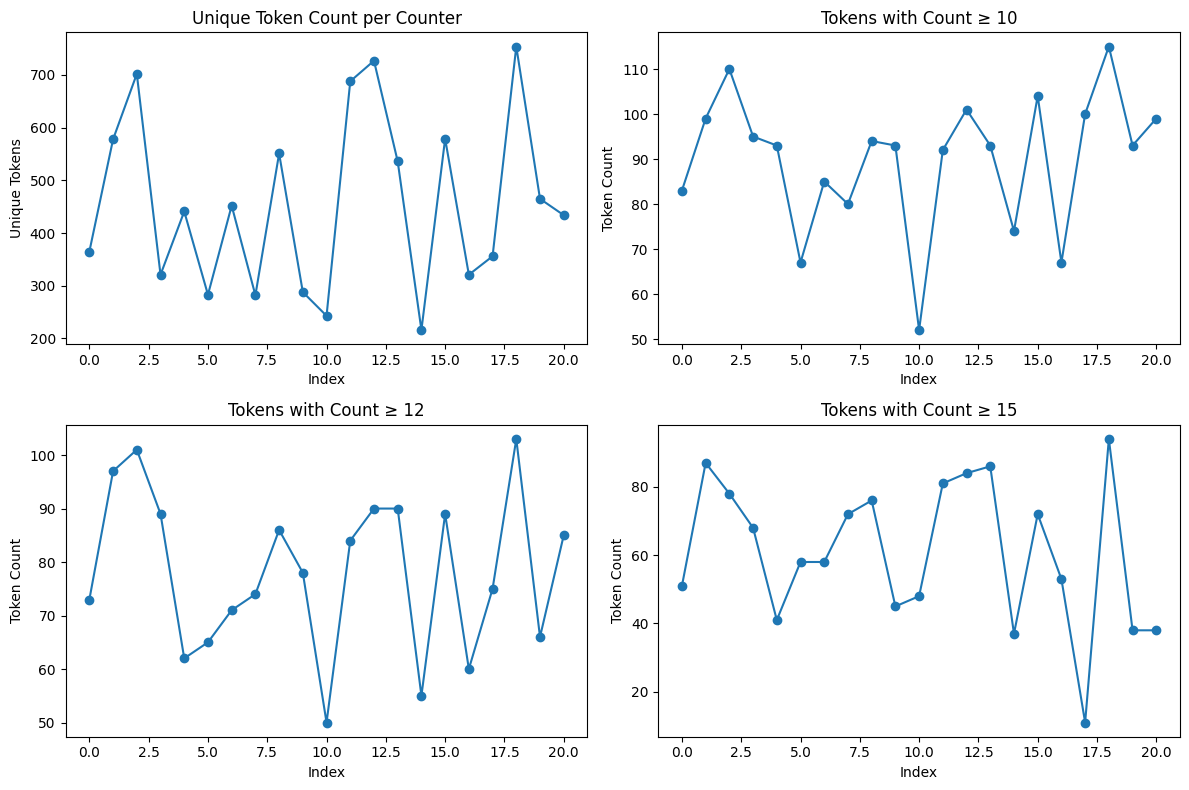

In [ ]:
import matplotlib.pyplot as plt

# 각 Counter의 통계 추출
lengths = [len(c) for c in final]
count_ge_10 = [sum(1 for v in c.values() if v >= 10) for c in final]
count_ge_12 = [sum(1 for v in c.values() if v >= 12) for c in final]
count_ge_15 = [sum(1 for v in c.values() if v >= 15) for c in final]

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(lengths, marker='o')
plt.title("Unique Token Count per Counter")
plt.xlabel("Index")
plt.ylabel("Unique Tokens")

plt.subplot(2, 2, 2)
plt.plot(count_ge_10, marker='o')
plt.title("Tokens with Count ≥ 10")
plt.xlabel("Index")
plt.ylabel("Token Count")

plt.subplot(2, 2, 3)
plt.plot(count_ge_12, marker='o')
plt.title("Tokens with Count ≥ 12")
plt.xlabel("Index")
plt.ylabel("Token Count")

plt.subplot(2, 2, 4)
plt.plot(count_ge_15, marker='o')
plt.title("Tokens with Count ≥ 15")
plt.xlabel("Index")
plt.ylabel("Token Count")

plt.tight_layout()
plt.show()

In [ ]:
final[10].most_common(40)

[('사건', 19),
 ('살인', 19),
 ('살해', 19),
 ('범인', 19),
 ('복수', 19),
 ('시체', 19),
 ('비밀', 19),
 ('의문', 19),
 ('목숨', 19),
 ('사고', 19),
 ('단서', 19),
 ('위협', 19),
 ('의심', 19),
 ('사실', 18),
 ('용의자', 18),
 ('추적', 18),
 ('현장', 18),
 ('납치', 18),
 ('발생', 18),
 ('진실', 18),
 ('실종', 18),
 ('경찰', 17),
 ('범죄', 17),
 ('조직', 17),
 ('마약', 17),
 ('형사', 17),
 ('수사', 17),
 ('발견', 17),
 ('계획', 17),
 ('은행', 17),
 ('작전', 17),
 ('동료', 17),
 ('보스', 17),
 ('마피아', 17),
 ('요원', 17),
 ('조사', 17),
 ('감옥', 17),
 ('충격', 17),
 ('죽음', 17),
 ('교도소', 17)]

In [ ]:
final[17].most_common(40)

[('여행', 17),
 ('세상', 17),
 ('사람', 16),
 ('대한', 16),
 ('이야기', 16),
 ('소년', 16),
 ('마을', 15),
 ('가족', 15),
 ('여정', 15),
 ('순간', 15),
 ('찾기', 15),
 ('위해', 14),
 ('시작', 14),
 ('모든', 14),
 ('모두', 14),
 ('다른', 14),
 ('요정', 14),
 ('죽음', 14),
 ('소녀', 14),
 ('모습', 14),
 ('바로', 14),
 ('모험', 14),
 ('지구', 14),
 ('동물', 14),
 ('마법', 14),
 ('어둠', 14),
 ('바다', 14),
 ('전설', 14),
 ('아프리카', 14),
 ('아이', 13),
 ('가장', 13),
 ('이름', 13),
 ('학교', 13),
 ('간다', 13),
 ('다시', 13),
 ('왕자', 13),
 ('인간', 13),
 ('도시', 13),
 ('전쟁', 13),
 ('보물', 13)]

In [100]:
attributes_c = []
for c in final:
    top_tokens = [token for token, _ in c.most_common(30)]
    attributes_c.append(top_tokens)

In [ ]:
attributes_c[17]

['여행',
 '세상',
 '사람',
 '대한',
 '이야기',
 '소년',
 '마을',
 '가족',
 '여정',
 '순간',
 '찾기',
 '위해',
 '시작',
 '모든',
 '모두',
 '다른',
 '요정',
 '죽음',
 '소녀',
 '모습',
 '바로',
 '모험',
 '지구',
 '동물',
 '마법',
 '어둠',
 '바다',
 '전설',
 '아프리카',
 '아이']

#3.WEAT

In [101]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

In [102]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [103]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes_c[i]])
        B = np.array([model.wv[word] for word in attributes_c[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [ ]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.9542561
SF 공연 -0.42360348
SF 공포(호러) -0.9491298
SF 기타 0.50974226
SF 다큐멘터리 0.41469523
SF 드라마 -0.6156724
SF 멜로로맨스 -0.8783505
SF 뮤지컬 0.15275551
SF 미스터리 -0.74825966
SF 범죄 -0.5769683
SF 사극 -0.02972464
SF 서부극(웨스턴) -0.35998398
SF 성인물(에로) -0.74207073
SF 스릴러 -0.6625906
SF 애니메이션 -0.8795112
SF 액션 -0.5907463
SF 어드벤처 -0.81403184
SF 전쟁 0.174596
SF 코미디 -0.8745906
SF 판타지 -0.6180697
가족 공연 0.76390165
가족 공포(호러) 0.57273746
가족 기타 1.0087353
가족 다큐멘터리 0.9678172
가족 드라마 0.5541163
가족 멜로로맨스 -0.26676714
가족 뮤지컬 0.9017922
가족 미스터리 0.38512847
가족 범죄 0.5807112
가족 사극 0.937439
가족 서부극(웨스턴) 0.9147158
가족 성인물(에로) -0.06339116
가족 스릴러 0.47651014
가족 애니메이션 0.70127034
가족 액션 0.5746481
가족 어드벤처 0.83308125
가족 전쟁 0.98065144
가족 코미디 -0.022432683
가족 판타지 0.7684197
공연 공포(호러) -0.32430416
공연 기타 0.87018883
공연 다큐멘터리 0.6849124
공연 드라마 -0.23522322
공연 멜로로맨스 -0.78943986
공연 뮤지컬 0.8461256
공연 미스터리 -0.27892765
공연 범죄 -0.101214215
공연 사극 0.9221871
공연 서부극(웨스턴) 0.49704376
공연 성인물(에로) -0.6930548
공연 스릴러 -0.19782124
공연 애니메이션 -0.4702614
공연 액션 -0.093529046


#4.평균 임베딩 벡터

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
def mean_embedding(cleaned_tokens, model,topk=10):
  genre_centers = [np.mean([model.wv[word] for word in genre if word in model.wv], axis=0)
                 for genre in cleaned_tokens]


  closest_words = []
  for center in genre_centers:
      sims = cosine_similarity([center], model.wv.vectors)
      idx = np.argsort(sims[0])[-topk:]  # top 10 단어
      closest_words.append([model.wv.index_to_key[i] for i in reversed(idx)])
  return closest_words

In [105]:
result=mean_embedding(valid_tokens,model,30)

In [54]:
result

[['예견',
  '맞닥뜨리',
  '악령',
  '무고',
  '봉인',
  '퍼즐',
  '종족',
  '가공',
  '괴생명체',
  '생물체',
  '생사',
  '살육',
  '파멸',
  '적의',
  '국면',
  '가고일',
  '전염',
  '존립',
  '가차',
  '처단',
  '희생',
  '불길',
  '암흑',
  '빅풋',
  '돌연변이',
  '시시각각',
  '전염병',
  '식인',
  '존속',
  '퍼트'],
 ['애나벨',
  '식구',
  '안과',
  '짊어지',
  '말문',
  '지은',
  '지숙',
  '미미',
  '소망',
  '향기',
  '혜지',
  '정이',
  '캐러멜',
  '기적처럼',
  '태원',
  '놀이터',
  '애디',
  '연지',
  '마들렌',
  '올리브',
  '뒤로',
  '시댁',
  '깃',
  '묘비',
  '쓸모',
  '리디아',
  '윤이',
  '달팽이',
  '민혁',
  '속삭임'],
 ['안토니',
  '여신',
  '대학동',
  '시몬',
  '올린다',
  '현석',
  '월리',
  '파코',
  '결실',
  '오매불망',
  '영원',
  '정인',
  '성찬',
  '진혁',
  '탄호이저',
  '아시',
  '동지',
  '애디',
  '살결',
  '봄바람',
  '아사코',
  '미쉘',
  '열병',
  '웬디',
  '캔디',
  '혜련',
  '헤메',
  '우도',
  '속죄',
  '아리아'],
 ['환영',
  '혼령',
  '맴도',
  '악령',
  '이비',
  '눈앞',
  '어간',
  '발자국',
  '올리브',
  '독약',
  '수수께끼',
  '죽지',
  '괴로움',
  '절규',
  '방문자',
  '덫',
  '조슈아',
  '원혼',
  '살인자',
  '환청',
  '그림자',
  '피하',
  '애도',
  '속삭임',
  '초코파이',
  '구미호',
  '도니',
  '목',
  '택하',
  '

In [115]:
attributes_c[17]

['모두',
 '사람',
 '세상',
 '다른',
 '죽음',
 '순간',
 '찾기',
 '시작',
 '여행',
 '가족',
 '소년',
 '아이',
 '대한',
 '이야기',
 '발견',
 '요정',
 '소녀',
 '다시',
 '모습',
 '바로',
 '모든',
 '위해',
 '이름',
 '간다',
 '왕자',
 '결심',
 '모험',
 '동물',
 '마법',
 '바다']

In [112]:
result[17]

['고난',
 '앗',
 '달걀',
 '계시',
 '올리브',
 '계곡',
 '잉태',
 '애도',
 '절규',
 '굴',
 '컬스틴',
 '축복',
 '셀린느',
 '발자국',
 '길이',
 '구미호',
 '흉내',
 '역경',
 '집합',
 '속삭임',
 '현세',
 '호랑이',
 '조상',
 '제물',
 '시련',
 '안식처',
 '하나님',
 '절벽',
 '소망',
 '씨앗']

#5.시각화

In [58]:
compare_axis=[17,20]

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])
def pca(attribute,X,Y,axis,model,title):
  selected1=attribute[axis[0]]
  selected2=attribute[axis[1]]
  A = np.array([model.wv[word] for word in selected1])
  B = np.array([model.wv[word] for word in selected2])

  all_vectors = np.concatenate([A, B, X, Y], axis=0)
  pca = PCA(n_components=2)
  pca.fit(all_vectors)
  pc_A = pca.transform(A)
  pc_B = pca.transform(B)
  pc_X = pca.transform(X)
  pc_Y = pca.transform(Y)

  fig, ax = plt.subplots()
  ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label=f'A, {genre_txt[axis[0]]}')
  ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label=f'B, {genre_txt[axis[1]]}')
  ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X, Art')
  ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y, Gen')

  ax.scatter(pc_A.mean(axis=0)[0], pc_A.mean(axis=0)[1], c='blue', marker='X', s=120, label='Center A')
  ax.scatter(pc_B.mean(axis=0)[0], pc_B.mean(axis=0)[1], c='red', marker='X', s=120, label='Center B')
  ax.scatter(pc_X.mean(axis=0)[0], pc_X.mean(axis=0)[1], c='skyblue', marker='X', s=120, label='Center X')
  ax.scatter(pc_Y.mean(axis=0)[0], pc_Y.mean(axis=0)[1], c='pink', marker='X', s=120, label='Center Y')

  ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)
  ax.set_title(title)
  ax.grid(True)

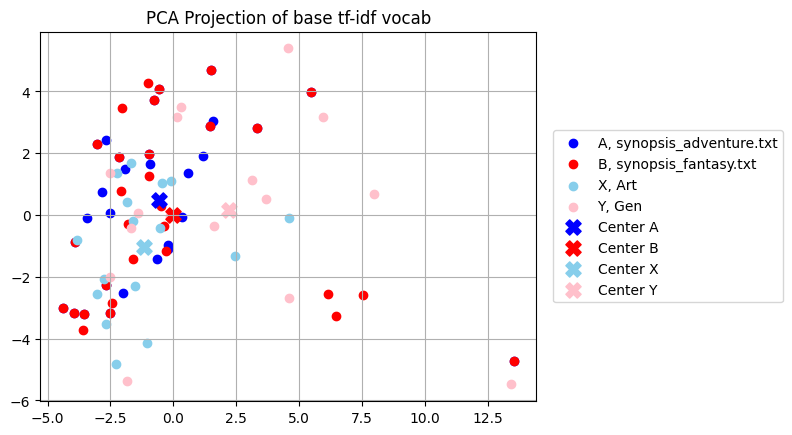

In [93]:
pca(attributes, X,Y, compare_axis, model, "PCA Projection of base tf-idf vocab")

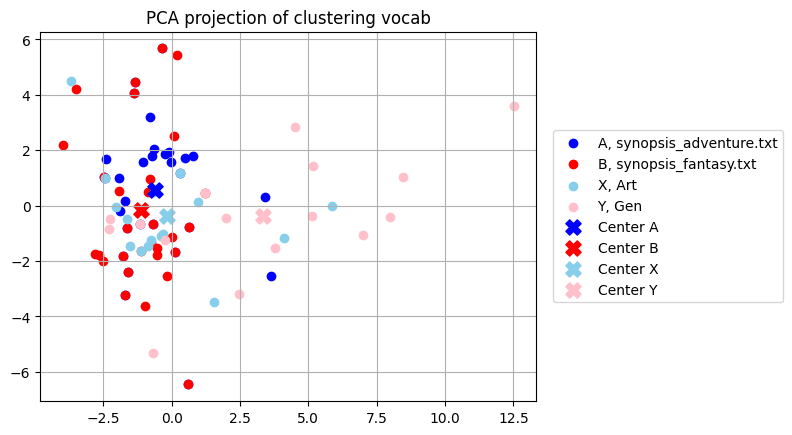

In [104]:
pca(attributes_c,X,Y,compare_axis, model, "PCA projection of clustering vocab")

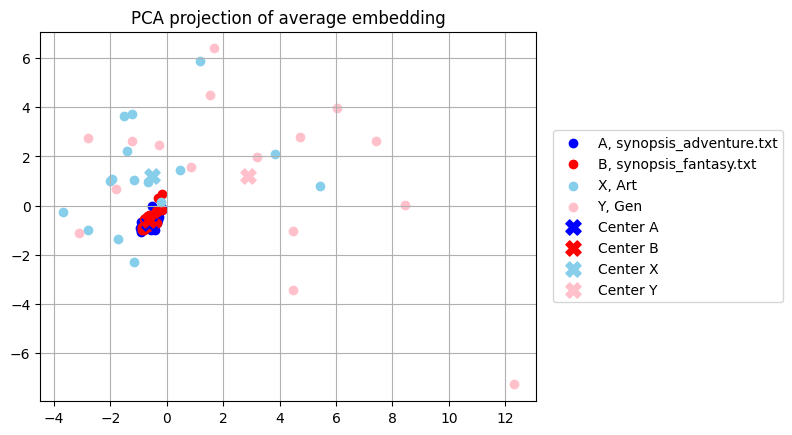

In [106]:
pca(result,X,Y,compare_axis,model,"PCA projection of average embedding")

In [ ]:
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

In [ ]:
print(f"현재 설정된 폰트: {plt.rcParams['font.family']}")

현재 설정된 폰트: ['NanumGothic']


In [107]:
genre_txt

['synopsis_SF.txt',
 'synopsis_family.txt',
 'synopsis_show.txt',
 'synopsis_horror.txt',
 'synopsis_etc.txt',
 'synopsis_documentary.txt',
 'synopsis_drama.txt',
 'synopsis_romance.txt',
 'synopsis_musical.txt',
 'synopsis_mystery.txt',
 'synopsis_crime.txt',
 'synopsis_historical.txt',
 'synopsis_western.txt',
 'synopsis_adult.txt',
 'synopsis_thriller.txt',
 'synopsis_animation.txt',
 'synopsis_action.txt',
 'synopsis_adventure.txt',
 'synopsis_war.txt',
 'synopsis_comedy.txt',
 'synopsis_fantasy.txt']

In [108]:
genre_eng = [name.replace('synopsis_', '').replace('.txt', '') for name in genre_txt]

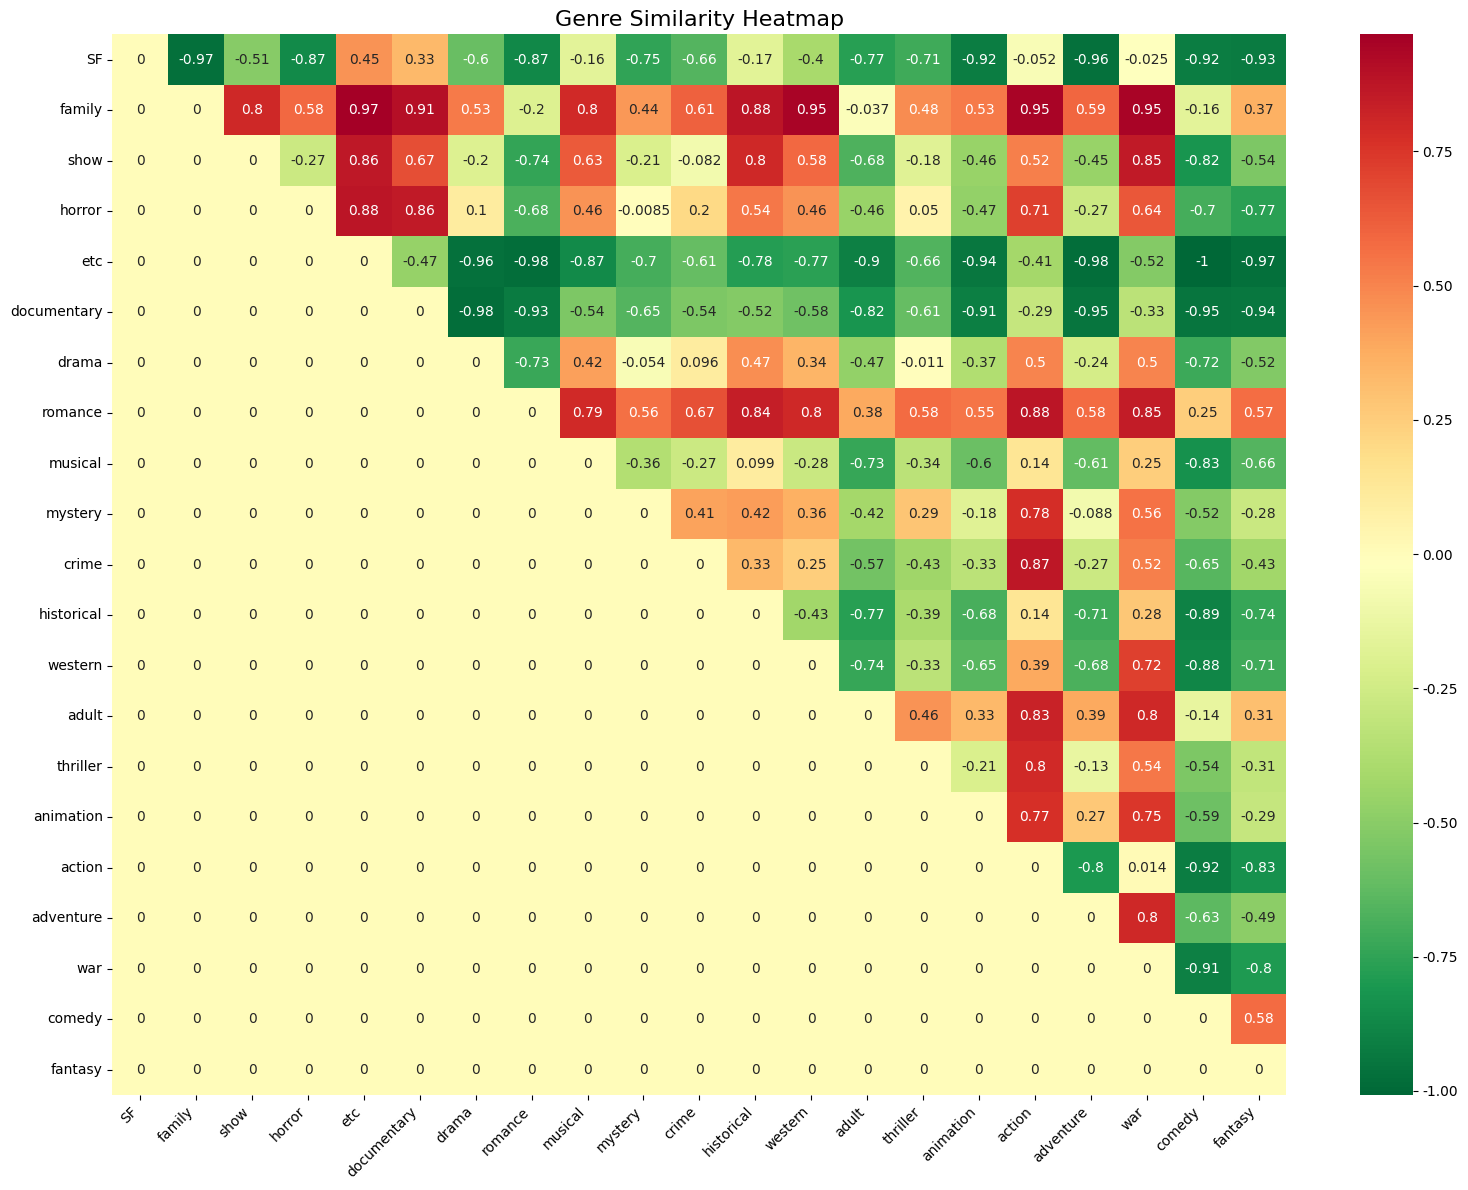

In [110]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
#sns.set(font='NanumGothic')

# 마이너스 부호

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(16, 12))

ax = sns.heatmap(matrix, xticklabels=genre_eng, yticklabels=genre_eng, annot=True,  cmap='RdYlGn_r')
plt.title("Genre Similarity Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#6.회고

tf-idf 21개의 장르별 vocab은 '그녀','자신','시작, '위해','사람'과 같은 중복단어가 많고 장르를 유의미하게 대표한다고 보이지 않았다.
중복단어를 제거할 경우 실제 유사한 장르에서 대표 단어가 겹칠 수 있는 가능성을 설명하지 못한다.

또한 모든 중복단어를 제거한 후 남은 단어들을 동일한 vocabsize에 맞게 tf-idf에서 추출하는 과정에서 몇몇 장르들은 점점 장르적 특성을 잘 대표하지 못하는 단어가 포함되기 시작한다. 따라서 중복단어를 유의미하게 유지하면서도 tf-idf가 포착하지못하는 장르 대표성, 유사성을 포착할 필요가 있다.

kmeans 클러스터링을 사용하였다. weat score를 구하기 위해 embedding 공간내에서 attirube의 의미축을 찾는 과정이므로 의미축이 잘 찾아지는지를 직접 embedding 공간내에서 군집화하여 판단하고자 했다.

장르 tf-idf에서 100개 추출 후 21개의 군집으로 클러스터링 결과는 영화 장르 구분보다는 그 단어의 속성 군집 경향이 더 강하고 몇몇 장르는 유의미한 vocab을 갖지 못한다. vocab size도 원하는대로 설정이 불가능하다.

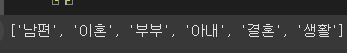

21개의 장르에 100개 추출 후 기준 장르와 20개의 비교장르를 2개로 클러스터링을 하고 그렇게 기준장르에 대해 모인 20개의 클러스터링 토큰들에서 중복되서 나타나는 단어는 그 장르가 다른 여러 장르와 구별되는 고유한 단어라 판단하였다.

기준장르도 21개 장르 전부에 대해 수행하여 attribute vocab set 구성하였을 때 실제 유사한 장르에서는 단어가 겹치기도 하였지만 그 장르를 다른장르와 구별할 수 있는 단어토큰들로 유의미하게 모였으며 vocabsize를 조절하기도 용이하였다.

데이터셋이 더 크다면 tf-idf에서 더 많은 유의미한 단어를 추출하고 단순 클러스터링 유무가 아닌 클러스터 중심으로부터 top-k에 속하는 단어토큰만 해당 클러스터로 인정하는 방식으로 더 정제할 가능성이 있다.

추가적으로 kmeans 기본형은 유클리드 거리 기반으로 클러스터링을 수행하는데 normalize후 kmeans를 수행하거나 sklearn_extra.cluster의 KMeans 를 사용하면 코사인거리 기반으로 kmeans를 수행할 수 있다. 다만, 유클리드 거리는 임베딩 벡터의 크기 차이를 반영할 수 있어 단어 간 의미적 강도나 밀도를 고려하는 데 더 적합하다고 판단하였다. 또한 코사인 거리 기반으로 수행하더라도 WEAT score 상에서 큰 차이가 발생하지 않을 것으로 예상되어, 별도의 실험은 수행하지 않았다.

각 토큰 100개의 평균임베딩을 구한 후 그것을 군집중심으로 보고 가장 가까운 단어를 뽑을 수 있으나 실제 데이터의 통계적 특성을 활용하지 못하고 임베딩 공간 내 각 장르의 분포를 구형으로 너무 단순화해서 바라보는 문제점이 있다. 실제로 괜찮은 단어를 뽑아주지만 다양성이 부족하거나 vocabsize를 늘렸을 때 실제 장르적 특성보다는 단어 유사성 위주로 vocab이 구성되는 한계를 보였다.

WEAT score의 해석은 가능하였으나, 영화 도메인에 대한 전문 지식이 부족하여 그 결과의 적절성을 판단하기는 어려웠다. 만약 영화 장르별로 예술 영화와 일반 영화에 대한 사회적 인식이나 통계적 편향을 보여주는 자료, 혹은 실제 사람을 대상으로 한 편향성 평가 실험 결과가 존재한다면, WEAT score와의 정량적 비교를 통해 보다 신뢰도 높은 평가가 가능할 것으로 보인다.

시각화 항목에서 attirube vocab 30, 구분이 어려울 것이라 판단되는 어드벤처와 판타지의 pca분포를 비교하였다.
1. base tf-idf
2. clsutering
3. average embedding

비교결과는 다음과 같다.
1. average embedding은 예상된대로 평균 임베딩 내에서 코사인 거리로 뽑는 방식이기 때문에 분포가 매우 단순화된다.
2. base tf-idf보다는 clustering이 군집중심간의 거리가 상대적으로 멀고 군집이 구분되는 특성이 있다.

In [122]:
import pandas as pd
df = pd.DataFrame({'adventure clustering': attributes_c[17], 'adventure average': result[17]})

# 출력
df.head(30)

,adventure clustering,adventure average
0,모두,고난
1,사람,앗
2,세상,달걀
3,다른,계시
4,죽음,올리브
5,순간,계곡
6,찾기,잉태
7,시작,애도
8,여행,절규
9,가족,굴
